In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
dir = os.path.dirname(os.getcwd())+"\\total_data\\Total.csv"
data = pd.read_csv(dir)

In [3]:
quantitative = data.columns.difference(["Date", '미국_GDP_Ann', '영국_GDP_Ann', '유로존_GDP_Ann', '일본_GDP_Ann', '한국_GDP_Ann', '미국_CPI_Ann', '영국_CPI_Ann', 
                                '유로존_CPI_Ann', '중국_CPI_Ann','한국_CPI_Ann', '미국_CCI_Ann', '영국_CCI_Ann', '유로존_CCI_Ann', '일본_CCI_Ann', '한국_CCI_Ann', 
                                '미국_Unemploy_Ann', '영국_Unemploy_Ann', '유로존_Unemploy_Ann', '일본_Unemploy_Ann', '한국_Unemploy_Ann']).tolist()
categorical = ['미국_GDP_Ann', '영국_GDP_Ann', '유로존_GDP_Ann', '일본_GDP_Ann', '한국_GDP_Ann', '미국_CPI_Ann', '영국_CPI_Ann', 
            '유로존_CPI_Ann', '중국_CPI_Ann','한국_CPI_Ann', '미국_CCI_Ann', '영국_CCI_Ann', '유로존_CCI_Ann', '일본_CCI_Ann', '한국_CCI_Ann', 
            '미국_Unemploy_Ann', '영국_Unemploy_Ann', '유로존_Unemploy_Ann', '일본_Unemploy_Ann', '한국_Unemploy_Ann']

In [4]:
GDP = [ '미국_GDP', '영국_GDP', '유로존_GDP', '일본_GDP', '한국_GDP']
Treasury_rate  = ['독일 2년_Price', '미국 2년_Price', '일본 2년_Price', '중국 2년_Price', '프랑스 2년_Price', '한국 2년_Price']
CPI = ['미국_CPI', '영국_CPI', '유로존_CPI', '중국_CPI', '한국_CPI']
CCI = ['미국_CCI', '영국_CCI', '유로존_CCI', '일본_CCI', '한국_CCI']
Unemployment_Rate = ['미국_Unemploy', '영국_Unemploy', '유로존_Unemploy', '일본_Unemploy', '한국_Unemploy']
Stock_Price = ['Germany_DAX_Close', 'Germany_MDAX_Close', 'Germany_TecDAX_Close', 'USA_SP500_Close', 'USA_NASDAQ_Close', 'USA_DOW_Close', 'Euro_STOCKS50_Close', 'Japan_JASDAQ20_Close', 
               'Japan_TOPIX_Close', 'Japan_NIKKEI_Close', 'China_FTSE_Close', 'China_SZSE_Close', 'China_SANGHAI_Close', 'France_CAC_Close', 'France_CACNEXT_Close', 'France_SBF_Close',
               'Korea_KOSDAQ_Close', 'Korea_KOSPI200_Close', 'Korea_KOSPI_Close', 'UK_FTSE_Close', 'UK_FTSE250_Close', 'UK_FTSEALL_Close']
Exchange_Rate = ['CNY_KRW_Close', 'EUR_KRW_Close', 'GBP_KRW_Close', 'JPY_KRW_Close', 'USD_CNY_Close', 'USD_GBP_Close', 'USD_JPY_Close', 'USD_KRW_Close']

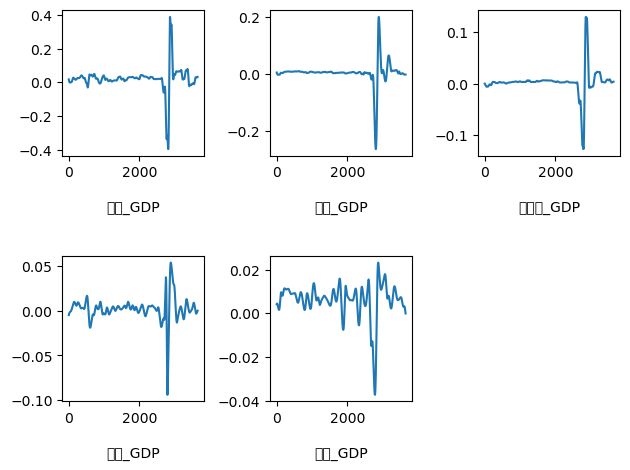

In [5]:
import warnings
warnings.filterwarnings(action='ignore')
# GDP
n = 1
for i in GDP:
    plt.subplot(2,3,n)
    plt.plot(data[[i]])
    #plt.ylim(-0.43, 0.43)
    plt.rc('axes', labelsize=10) 
    plt.tight_layout(h_pad=3, w_pad=1)
    plt.xlabel(i, labelpad=15)
    n += 1

In [6]:
# 미국의 GDP가 뚝 떨어졌던 건 있었던 일(세계 경제성장률 하향 조정), 다음달에 회복 -> 최솟값은 실제값이 아닌 보간 과정에서 생긴 값
# 다른 값들은 비교적 유의미하게 떨어지진 않았고, 비슷한 시기 값이 떨어진 것으로 보임
data.loc[data[GDP].idxmin()]

,미국_GDP,영국_GDP,유로존_GDP,일본_GDP,한국_GDP,독일 2년_Price,미국 2년_Price,일본 2년_Price,중국 2년_Price,프랑스 2년_Price,...,미국_CCI_Ann,영국_CCI_Ann,유로존_CCI_Ann,일본_CCI_Ann,한국_CCI_Ann,미국_Unemploy_Ann,영국_Unemploy_Ann,유로존_Unemploy_Ann,일본_Unemploy_Ann,한국_Unemploy_Ann
2818,-0.396017,-0.250386,-0.081445,-0.058405,-0.017747,-0.689000,0.141100,-0.143000,2.738000,-0.634000,...,0,0,0,0,0,0,0,0,0,0
2807,-0.362909,-0.264375,-0.120127,-0.080909,-0.027831,-0.686000,0.140800,-0.128000,2.810000,-0.623000,...,0,0,0,0,0,0,0,0,0,0
2798,-0.322327,-0.256003,-0.127834,-0.093353,-0.033620,-0.658163,0.120078,-0.110261,2.715595,-0.576306,...,0,0,0,0,0,0,0,0,0,0
2796,-0.317000,-0.252090,-0.127516,-0.094071,-0.034526,-0.642000,0.160200,-0.117000,2.675000,-0.596000,...,0,0,0,0,0,0,0,0,0,0
2782,-0.327099,-0.208064,-0.120822,-0.060193,-0.037393,-0.644000,0.164900,-0.121000,2.580000,-0.572000,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.loc[data[GDP].idxmax()]

,미국_GDP,영국_GDP,유로존_GDP,일본_GDP,한국_GDP,독일 2년_Price,미국 2년_Price,일본 2년_Price,중국 2년_Price,프랑스 2년_Price,...,미국_CCI_Ann,영국_CCI_Ann,유로존_CCI_Ann,일본_CCI_Ann,한국_CCI_Ann,미국_Unemploy_Ann,영국_Unemploy_Ann,유로존_Unemploy_Ann,일본_Unemploy_Ann,한국_Unemploy_Ann
2869,0.388400,0.131003,0.128507,0.042527,0.022807,-0.744476,0.166133,-0.144000,2.932464,-0.681020,...,0,0,0,0,0,0,0,0,0,0
2891,0.325823,0.199410,0.128030,0.054044,0.021198,-0.741000,0.150500,-0.123000,2.974000,-0.709000,...,0,0,0,0,0,0,0,0,0,0
2865,0.380944,0.102216,0.129809,0.037404,0.022049,-0.793000,0.148700,-0.118000,2.864000,-0.724000,...,0,0,0,0,0,0,0,0,0,0
2890,0.325913,0.199258,0.127957,0.054050,0.021393,-0.754240,0.142183,-0.130000,2.990584,-0.717703,...,0,0,0,0,0,0,0,0,0,0
2875,0.374921,0.164915,0.125712,0.048507,0.023172,-0.729939,0.184774,-0.145008,3.013893,-0.686421,...,0,0,0,0,0,0,0,0,0,0


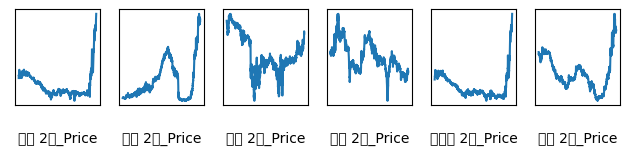

In [8]:
#국채금리
n = 1
for i in Treasury_rate:
    plt.subplot(3,6,n)
    plt.plot(data[[i]])
    plt.rc('axes', labelsize=10) 
    plt.gca().axes.xaxis.set_ticks([])
    plt.gca().axes.yaxis.set_ticks([])
    plt.tight_layout(h_pad=3, w_pad=1)
    plt.xlabel(i, labelpad=15)
    n += 1

In [ ]:
# 보간
df = data["일본 1년_Price"].drop(884)
df = df.drop(887)
df = df.drop(888)
df = df.drop(881)
df.max()

In [11]:
data[Treasury_rate].loc[data[Treasury_rate].idxmax()]

,독일 2년_Price,미국 2년_Price,일본 2년_Price,중국 2년_Price,프랑스 2년_Price,한국 2년_Price
3651,2.731,4.4279,0.032,2.343,2.851,3.791
3598,2.191,4.7280,-0.040,2.084,2.311,4.247
178,0.193,0.3590,0.149,3.380,0.296,2.850
359,0.227,0.4070,0.100,4.500,0.303,2.830
3651,2.731,4.4279,0.032,2.343,2.851,3.791
3581,2.040,4.4830,-0.007,2.090,2.080,4.489


In [12]:
# 일본 1년 채권 결과 가장 높은 값은 확인되지 않은 값으로 보임 -> 2015년 시기 
# 중국 2년 채권 결과 가장 낮은 값은 확인되지 않은 값으로 보임 -> 1년 채권, 3년 채권과 함께 보았을 때 다들 동향이 비슷하지만 중국 2년 채권만 다름 -> 보간 혹은 제거해야할 값
data[Treasury_rate].loc[data[Treasury_rate].idxmin()]

,독일 2년_Price,미국 2년_Price,일본 2년_Price,중국 2년_Price,프랑스 2년_Price,한국 2년_Price
2625,-1.006000,0.408500,-0.310000,2.186000,-0.769000,1.026
2980,-0.677442,0.099902,-0.124657,2.802009,-0.639488,0.850
1304,-0.618000,0.722400,-0.364000,2.458000,-0.554000,1.247
2679,-0.747061,0.191089,-0.144060,1.296031,-0.620479,0.952
2434,-0.898000,1.509872,-0.305138,2.666532,-0.853451,1.219
2774,-0.695000,0.119100,-0.133000,2.485000,-0.599000,0.702


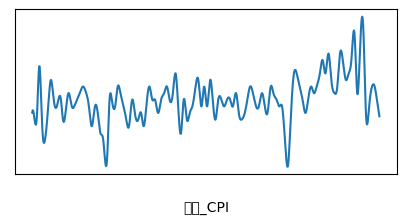

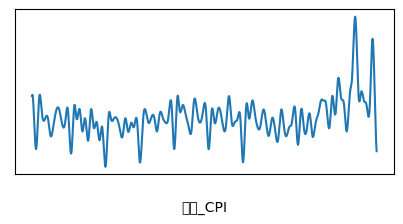

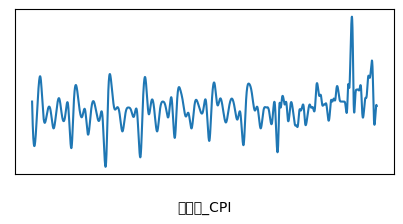

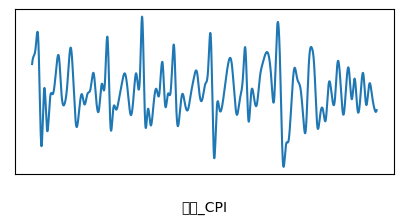

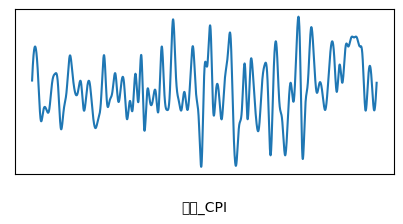

In [13]:
# 소비자 물가지수
n = 1
for i in CPI:
    plt.figure(figsize=(20,2))
    plt.subplot(1,5,n)
    plt.plot(data[[i]])
    plt.rc('axes', labelsize=10) 
    plt.gca().axes.xaxis.set_ticks([])
    plt.gca().axes.yaxis.set_ticks([])
    plt.tight_layout(h_pad=3, w_pad=1)
    plt.xlabel(i, labelpad=15)
    n += 1

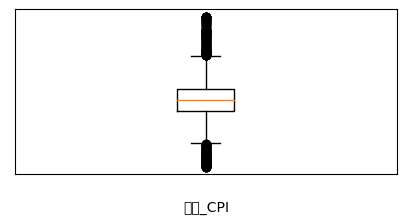

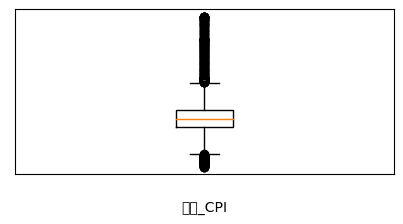

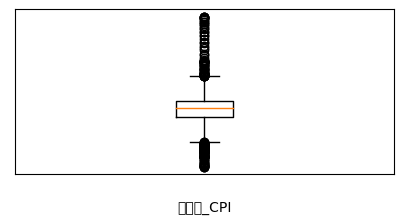

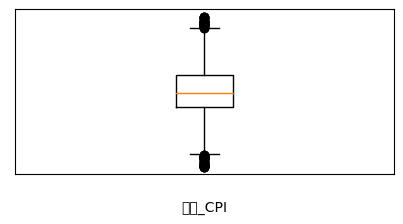

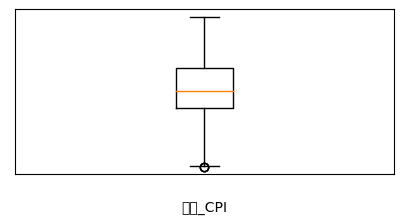

In [14]:
n = 1
for i in CPI:
    plt.figure(figsize=(20,2))
    plt.subplot(1,5,n)
    plt.boxplot(data[[i]])
    plt.rc('axes', labelsize=10) 
    plt.gca().axes.xaxis.set_ticks([])
    plt.gca().axes.yaxis.set_ticks([])
    plt.tight_layout(h_pad=3, w_pad=1)
    plt.xlabel(i, labelpad=15)
    n += 1

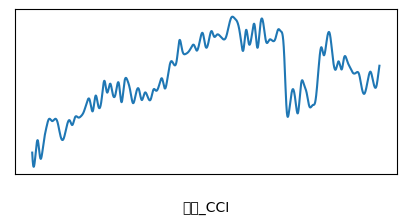

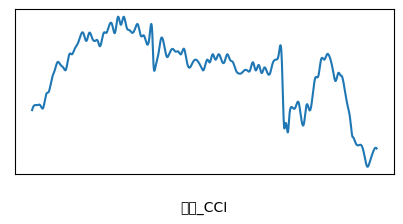

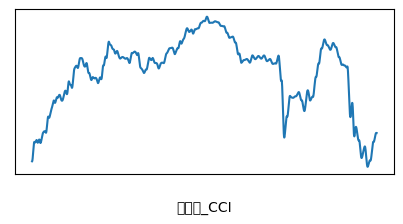

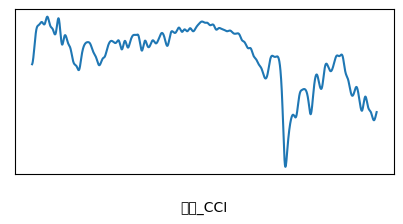

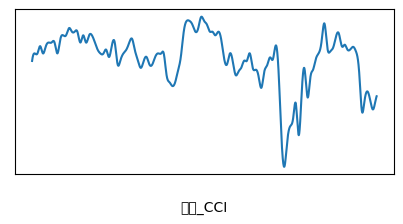

In [15]:
n = 1
for i in CCI:
    plt.figure(figsize=(20,2))
    plt.subplot(1,5,n)
    plt.plot(data[[i]])
    plt.rc('axes', labelsize=10) 
    plt.gca().axes.xaxis.set_ticks([])
    plt.gca().axes.yaxis.set_ticks([])
    plt.tight_layout(h_pad=3, w_pad=1)
    plt.xlabel(i, labelpad=15)
    n += 1

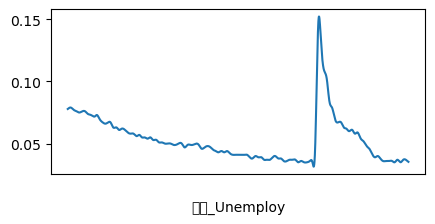

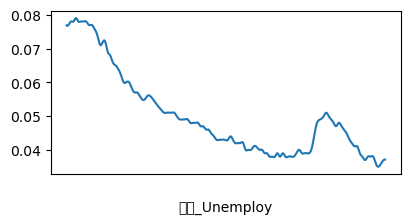

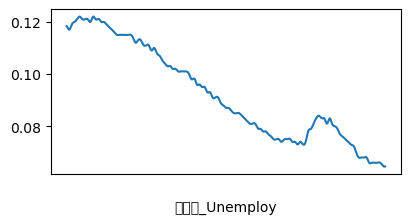

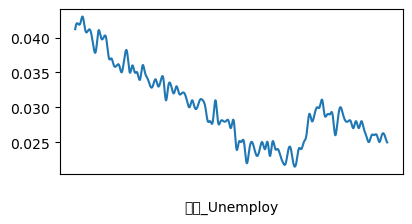

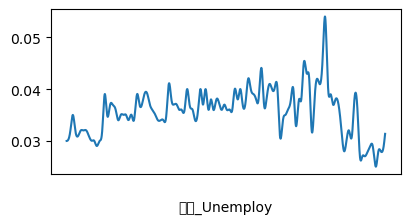

In [16]:
n = 1
for i in Unemployment_Rate:
    plt.figure(figsize=(20,2))
    plt.subplot(1,5,n)
    plt.plot(data[[i]])
    plt.rc('axes', labelsize=10) 
    plt.gca().axes.xaxis.set_ticks([])
    plt.tight_layout(h_pad=3, w_pad=1)
    plt.xlabel(i, labelpad=15)
    n += 1

In [17]:
# https://www.hani.co.kr/arti/PRINT/946003.html
# 미국 : 코로나때문에 타격
data[Unemployment_Rate].loc[data[Unemployment_Rate].idxmax()]

,미국_Unemploy,영국_Unemploy,유로존_Unemploy,일본_Unemploy,한국_Unemploy
2693,0.152168,0.039088,0.073710,0.025368,0.038493
106,0.075480,0.079000,0.120450,0.041902,0.031349
306,0.072852,0.076446,0.122035,0.039831,0.030092
85,0.076294,0.078247,0.119885,0.043012,0.033890
2961,0.062753,0.050609,0.082546,0.029022,0.054043


In [18]:
data.loc[data["USA_SP500_Close"].idxmax()]

미국_GDP              0.037060
영국_GDP              0.011669
유로존_GDP             0.012506
일본_GDP             -0.001164
한국_GDP              0.007743
                      ...   
미국_Unemploy_Ann     0.000000
영국_Unemploy_Ann     0.000000
유로존_Unemploy_Ann    0.000000
일본_Unemploy_Ann     0.000000
한국_Unemploy_Ann     0.000000
Name: 3290, Length: 76, dtype: float64

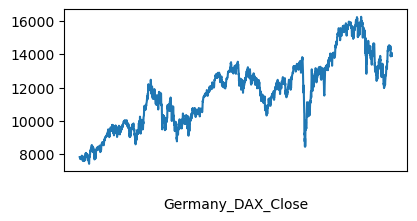

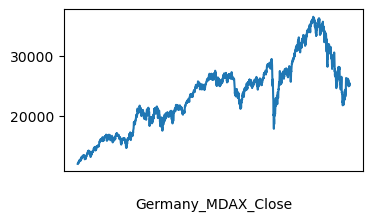

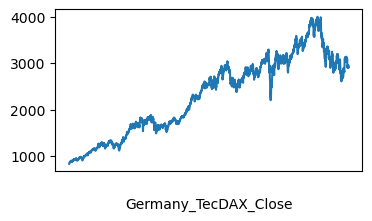

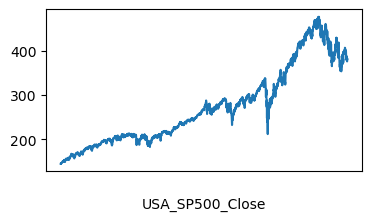

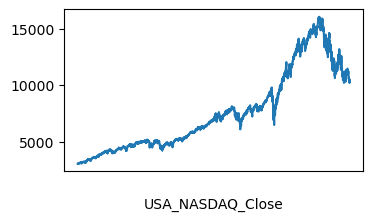

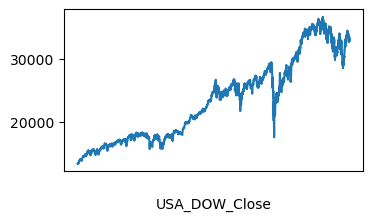

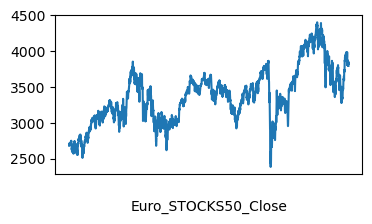

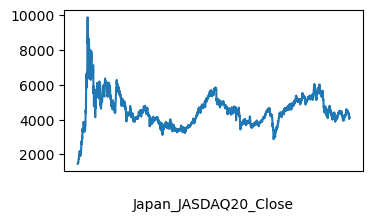

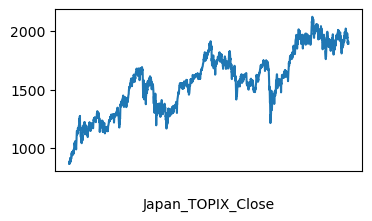

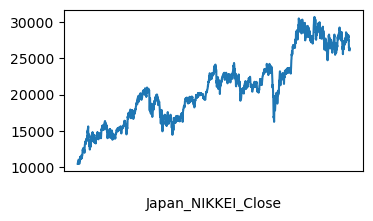

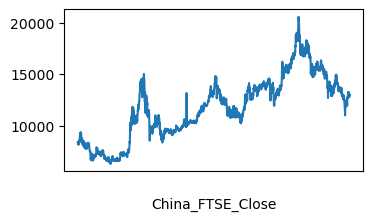

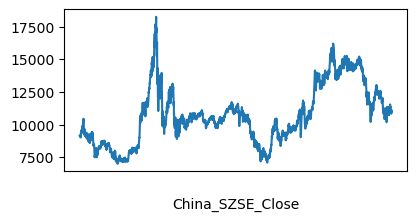

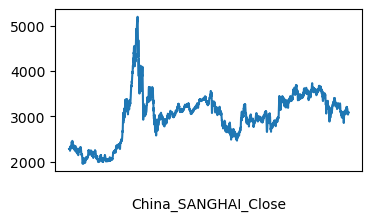

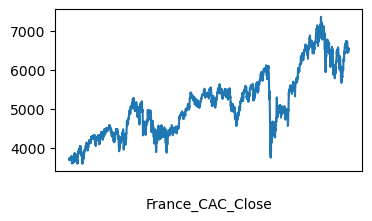

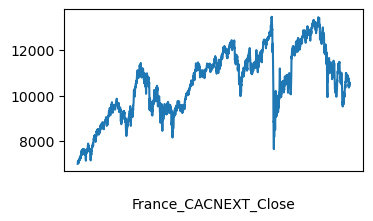

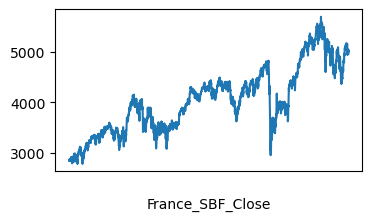

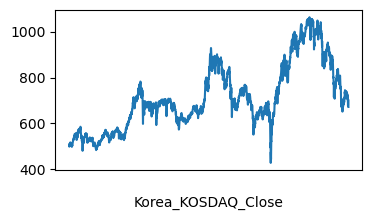

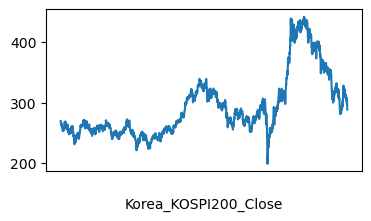

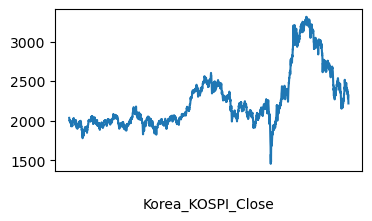

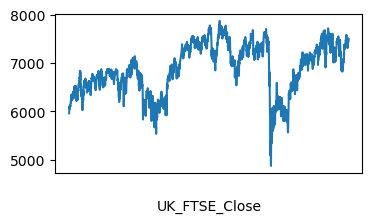

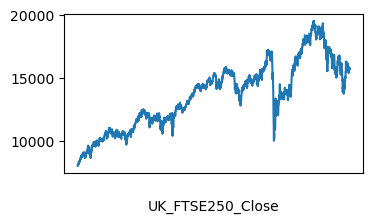

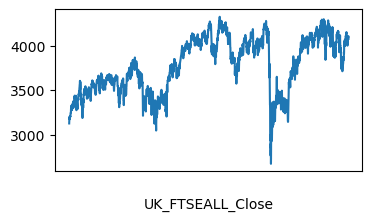

In [19]:
n = 1
for i in Stock_Price:
    plt.figure(figsize=(40,4))
    plt.subplot(2,11,n)
    plt.plot(data[[i]])
    plt.rc('axes', labelsize=10) 
    plt.gca().axes.xaxis.set_ticks([])
    plt.tight_layout(h_pad=3, w_pad=1)
    plt.xlabel(i, labelpad=15)
    n += 1

In [20]:
data[Exchange_Rate].loc[data[Exchange_Rate].idxmin()]

,CNY_KRW_Close,EUR_KRW_Close,GBP_KRW_Close,JPY_KRW_Close,USD_CNY_Close,USD_GBP_Close,USD_JPY_Close,USD_KRW_Close
2162,160.553324,1260.598183,1416.836819,9.756845,6.932574,0.785606,114.082882,1113.054616
831,176.556446,1158.588257,1601.998967,9.129727,6.213119,0.684840,120.154098,1097.026366
1380,167.360000,1243.570000,1363.770000,10.867900,6.722000,0.824900,103.520000,1124.990000
884,178.690000,1248.440000,1699.090000,8.913200,6.197800,0.651800,124.250000,1107.510000
379,175.360000,1449.200000,1741.700000,10.165500,6.041200,0.608200,104.220000,1059.400000
548,162.560000,1379.160000,1733.030000,9.918400,6.210600,0.582600,101.790000,1009.600000
0,170.720000,1403.100000,1727.780000,12.283600,6.230300,0.615600,86.690000,1063.640000
549,162.470000,1373.690000,1731.320000,9.876200,6.212000,0.582900,102.190000,1009.250000


In [21]:
data.iloc[2840]

미국_GDP             -0.101905
영국_GDP             -0.122635
유로존_GDP             0.047045
일본_GDP             -0.009174
한국_GDP              0.005555
                      ...   
미국_Unemploy_Ann     0.000000
영국_Unemploy_Ann     0.000000
유로존_Unemploy_Ann    0.000000
일본_Unemploy_Ann     0.000000
한국_Unemploy_Ann     0.000000
Name: 2840, Length: 76, dtype: float64

In [22]:
Exchange_Rate

['CNY_KRW_Close',
 'EUR_KRW_Close',
 'GBP_KRW_Close',
 'JPY_KRW_Close',
 'USD_CNY_Close',
 'USD_GBP_Close',
 'USD_JPY_Close',
 'USD_KRW_Close']

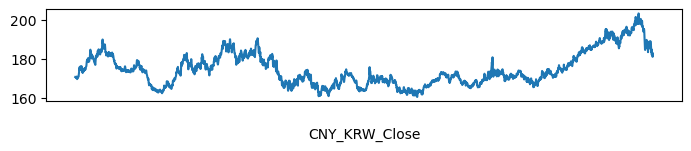

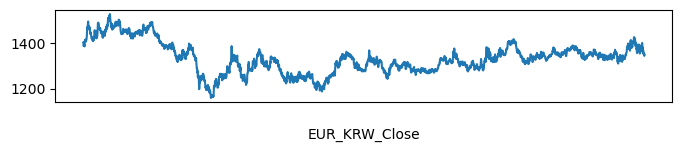

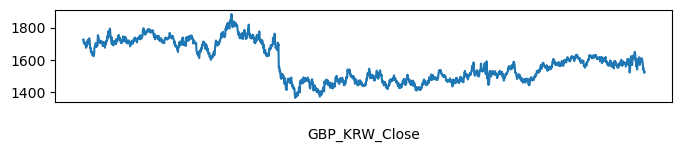

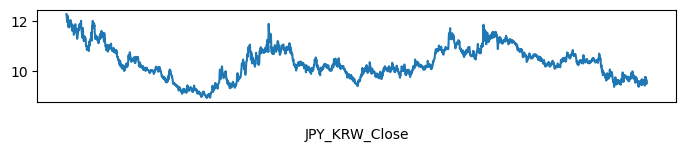

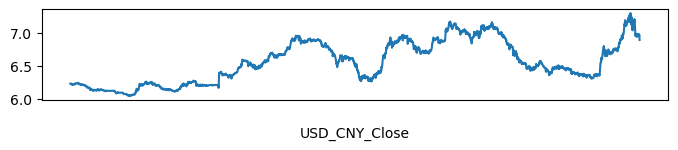

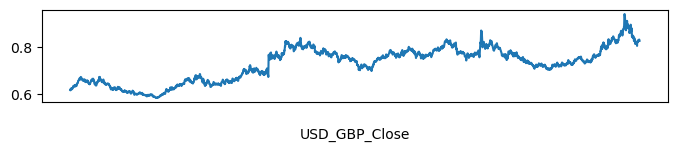

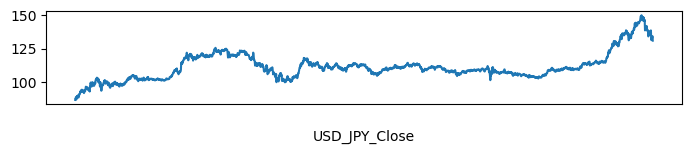

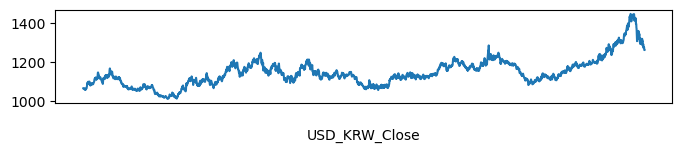

In [23]:
n = 1
for i in Exchange_Rate:
    plt.figure(figsize=(20,4))
    plt.subplot(3,3,n)
    plt.plot(data[[i]])
    plt.rc('axes', labelsize=10) 
    plt.gca().axes.xaxis.set_ticks([])
    plt.tight_layout(h_pad=3, w_pad=1)
    plt.xlabel(i, labelpad=15)
    n += 1

In [24]:

def adf_test(data):
    result = adfuller(data.values)
    return result[1]

cols = GDP + Treasury_rate + CPI + CCI + Unemployment_Rate + Stock_Price + Exchange_Rate

station = []
non_station = []
for col in cols:
    if adf_test(data[[col]]) < 0.05:
        station.append(col)
    else: non_station.append(col)
    print("-------------{}--------------".format(col))
    print("p-value: {}".format(adf_test(data[[col]])))

-------------미국_GDP--------------
p-value: 5.003746210478524e-06
-------------영국_GDP--------------
p-value: 1.1490991124114971e-07
-------------유로존_GDP--------------
p-value: 3.875596783866673e-10
-------------일본_GDP--------------
p-value: 1.604611337366145e-07
-------------한국_GDP--------------
p-value: 3.864059167508087e-05
-------------독일 2년_Price--------------
p-value: 1.0
-------------미국 2년_Price--------------
p-value: 0.9902673876867643
-------------일본 2년_Price--------------
p-value: 0.23240773389002595
-------------중국 2년_Price--------------
p-value: 0.13383517960185992
-------------프랑스 2년_Price--------------
p-value: 1.0
-------------한국 2년_Price--------------
p-value: 0.8963906479814704
-------------미국_CPI--------------
p-value: 0.01200863346058022
-------------영국_CPI--------------
p-value: 0.0011474293976279524
-------------유로존_CPI--------------
p-value: 1.9558051496947027e-09
-------------중국_CPI--------------
p-value: 1.2731473232118894e-07
-------------한국_CPI--------------
p-v

In [25]:
test = data[cols].diff().dropna()

In [222]:
test_station = []
test_non_station = []
for col in cols:
    if adf_test(test[[col]]) < 0.05:
        test_station.append(col)
    else: test_non_station.append(col)
    print("-------------{}--------------".format(col))
    print("p-value: {}".format(adf_test(test[[col]])))

-------------미국_GDP--------------
p-value: 1.7928247860151107e-18
-------------영국_GDP--------------
p-value: 5.48128756825682e-14
-------------유로존_GDP--------------
p-value: 1.746395901228944e-08
-------------일본_GDP--------------
p-value: 6.844186507962807e-12
-------------한국_GDP--------------
p-value: 6.422374557074193e-11
-------------독일 1년_Price--------------
p-value: 2.403570545252144e-11
-------------독일 2년_Price--------------
p-value: 3.146125050113036e-16
-------------독일 3년_Price--------------
p-value: 4.7208805282864824e-18
-------------미국 1년_Price--------------
p-value: 8.67978490101135e-10
-------------미국 2년_Price--------------
p-value: 1.4582024289002748e-16
-------------미국 3년_Price--------------
p-value: 7.951968833832803e-26
-------------일본 1년_Price--------------
p-value: 2.5146531213811655e-30
-------------일본 2년_Price--------------
p-value: 3.0396790682313245e-20
-------------일본 3년_Price--------------
p-value: 1.0583938081100935e-20
-------------중국 1년_Price--------------
p

In [28]:

# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)

# make prediction
yhat = model_fit.forecast()
print(yhat)

[[0.55030541 0.98656306]]


In [289]:
# 상관분석
from statsmodels.tsa.vector_ar.vecm import coint_johansen
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,9)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cols = GDP + Treasury_rate + CPI + CCI + Unemployment_Rate + Stock_Price + Exchange_Rate
cointegration_test(data[cols])

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
미국_GDP ::  16197.51  > nan       =>   False
영국_GDP ::  15519.46  > nan       =>   False
유로존_GDP ::  14862.21  > nan       =>   False
일본_GDP ::  14221.76  > nan       =>   False
한국_GDP ::  13615.08  > nan       =>   False
독일 1년_Price ::  13037.62  > nan       =>   False
독일 2년_Price ::  12495.82  > nan       =>   False
독일 3년_Price ::  11979.67  > nan       =>   False
미국 1년_Price ::  11480.48  > nan       =>   False
미국 2년_Price ::  11005.43  > nan       =>   False
미국 3년_Price ::  10537.6   > nan       =>   False
일본 1년_Price ::  10079.76  > nan       =>   False
일본 2년_Price ::  9640.51   > nan       =>   False
일본 3년_Price ::  9219.79   > nan       =>   False
중국 1년_Price ::  8806.9    > nan       =>   False
중국 2년_Price ::  8405.79   > nan       =>   False
중국 3년_Price ::  8013.95   > nan       =>   False
프랑스 1년_Price ::  7637.71   > nan       =>   False
프랑스 2년_Price ::  7278.54   > nan       =>   False
프랑

In [31]:
quantitative[0:11]

['CNY_KRW_Close',
 'China_FTSE_Close',
 'China_SANGHAI_Close',
 'China_SZSE_Close',
 'EUR_KRW_Close',
 'Euro_STOCKS50_Close',
 'France_CACNEXT_Close',
 'France_CAC_Close',
 'France_SBF_Close',
 'GBP_KRW_Close',
 'Germany_DAX_Close']

In [323]:
data[quantitative[0:11]].squeeze()

,CNYUSD_Close,CNYUSD_High,CNYUSD_Low,CNYUSD_Open,China_FTSE_Close,China_FTSE_High,China_FTSE_Low,China_FTSE_Open,China_SANGHAI_Close,China_SANGHAI_High,China_SANGHAI_Low
0,0.160500,0.160500,0.160500,0.160500,8401.400417,8437.713477,8236.460926,8246.027987,2283.829230,2288.713839,2252.494694
1,0.160500,0.160500,0.160500,0.160500,8412.313835,8497.628953,8275.402852,8296.326973,2284.962460,2296.721679,2257.555388
2,0.160500,0.160500,0.160500,0.160500,8399.422835,8523.604953,8293.775852,8320.069973,2280.144460,2297.773679,2257.093388
3,0.160500,0.160500,0.160300,0.160500,8400.410000,8527.200000,8311.100000,8329.000000,2276.990000,2296.110000,2256.560000
4,0.160439,0.160503,0.160247,0.160516,8437.149160,8518.826518,8339.290552,8335.455164,2280.584384,2295.085377,2259.844138
...,...,...,...,...,...,...,...,...,...,...,...
3647,0.143600,0.143700,0.143100,0.143100,12869.820000,12961.570000,12852.490000,12916.500000,3065.560000,3071.840000,3047.350000
3648,0.143700,0.143900,0.143500,0.143600,13027.310000,13074.440000,12869.820000,12869.820000,3095.570000,3098.080000,3074.310000
3649,0.143300,0.143600,0.143300,0.143600,13016.720000,13050.510000,12912.300000,13027.310000,3087.400000,3098.650000,3079.430000
3650,0.143600,0.143700,0.143200,0.143300,12928.410000,13016.720000,12847.180000,13016.720000,3073.700000,3086.000000,3064.460000


In [328]:
from statsmodels.tsa.stattools import coint
_, p_value, _ = coint(data["KRWUSD_Close"],data[['CNYUSD_Close', 'CNYUSD_High']])
p_value

0.7172527262529322

## 이상치 제거, 재보간

In [ ]:
GDP = [ '미국_GDP', '영국_GDP', '유로존_GDP', '일본_GDP', '한국_GDP']
Treasury_rate  = ['독일 2년_Price', '미국 2년_Price', '일본 2년_Price', '중국 2년_Price', '프랑스 2년_Price', '한국 2년_Price']
CPI = ['미국_CPI', '영국_CPI', '유로존_CPI', '중국_CPI', '한국_CPI']
CCI = ['미국_CCI', '영국_CCI', '유로존_CCI', '일본_CCI', '한국_CCI']
Unemployment_Rate = ['미국_Unemploy', '영국_Unemploy', '유로존_Unemploy', '일본_Unemploy', '한국_Unemploy']
Stock_Price = ['Germany_DAX_Close', 'Germany_MDAX_Close', 'Germany_TecDAX_Close', 'USA_SP500_Close', 'USA_NASDAQ_Close', 'USA_DOW_Close', 'Euro_STOCKS50_Close', 'Japan_JASDAQ20_Close', 
               'Japan_TOPIX_Close', 'Japan_NIKKEI_Close', 'China_FTSE_Close', 'China_SZSE_Close', 'China_SANGHAI_Close', 'France_CAC_Close', 'France_CACNEXT_Close', 'France_SBF_Close',
               'Korea_KOSDAQ_Close', 'Korea_KOSPI200_Close', 'Korea_KOSPI_Close', 'UK_FTSE_Close', 'UK_FTSE250_Close', 'UK_FTSEALL_Close']
Exchange_Rate = ['CNY_KRW_Close', 'EUR_KRW_Close', 'GBP_KRW_Close', 'JPY_KRW_Close', 'USD_CNY_Close', 'USD_GBP_Close', 'USD_JPY_Close', 'USD_KRW_Close']
quantitative = GDP + Treasury_rate + CPI + CCI + Unemployment_Rate + Stock_Price + Exchange_Rate
categorical = ['미국_GDP_Ann', '영국_GDP_Ann', '유로존_GDP_Ann', '일본_GDP_Ann', '한국_GDP_Ann', '미국_CPI_Ann', '영국_CPI_Ann', 
            '유로존_CPI_Ann', '중국_CPI_Ann','한국_CPI_Ann', '미국_CCI_Ann', '영국_CCI_Ann', '유로존_CCI_Ann', '일본_CCI_Ann', '한국_CCI_Ann', 
            '미국_Unemploy_Ann', '영국_Unemploy_Ann', '유로존_Unemploy_Ann', '일본_Unemploy_Ann', '한국_Unemploy_Ann']

In [ ]:
Total["중국 2년_Price"].iloc[366:371] = np.nan # 2014-01-01 ~ 2014-01-05, 이상치와 이상치에 의해 보간된 값 모두 제거 후 재생성
Total["중국 2년_Price"] = Total["중국 2년_Price"].interpolate(method='cubic',axis=0)

In [61]:
data

,미국_GDP,영국_GDP,유로존_GDP,일본_GDP,한국_GDP,독일 2년_Price,미국 2년_Price,일본 2년_Price,중국 2년_Price,프랑스 2년_Price,...,미국_CCI_Ann,영국_CCI_Ann,유로존_CCI_Ann,일본_CCI_Ann,한국_CCI_Ann,미국_Unemploy_Ann,영국_Unemploy_Ann,유로존_Unemploy_Ann,일본_Unemploy_Ann,한국_Unemploy_Ann
0,0.017648,0.004322,-0.000178,-0.004708,0.004083,-0.028000,0.2507,0.108,3.085000,0.054000,...,0,0,0,0,0,0,0,0,0,0
1,0.016288,0.003766,-0.000253,-0.004514,0.004150,0.036000,0.2590,0.099,2.998709,0.075000,...,0,0,0,0,0,0,0,0,0,0
2,0.014992,0.003236,-0.000337,-0.004328,0.004209,0.051000,0.2710,0.099,3.021639,0.126000,...,0,0,0,0,0,0,0,0,0,0
3,0.013757,0.002731,-0.000429,-0.004149,0.004260,0.080000,0.2680,0.097,3.080000,0.186000,...,0,0,0,0,0,1,0,0,0,0
4,0.012584,0.002252,-0.000529,-0.003977,0.004304,0.092214,0.2675,0.100,3.100000,0.190149,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,0.032274,-0.002860,0.003601,-0.000238,0.000441,2.605000,4.3317,0.031,2.371000,2.687000,...,0,0,0,0,0,0,0,0,0,0
3648,0.032300,-0.002820,0.003609,-0.000145,0.000298,2.679000,4.3827,0.032,2.415000,2.779000,...,0,0,0,0,1,0,0,0,1,0
3649,0.032310,-0.002779,0.003614,-0.000052,0.000152,2.674000,4.3574,0.046,2.395000,2.765000,...,0,0,0,0,0,0,0,0,0,0
3650,0.032305,-0.002736,0.003615,0.000039,0.000006,2.662000,4.3656,0.046,2.353000,2.741000,...,0,0,0,0,0,0,0,0,0,0
